# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Import Dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2460.0,3.817480,3.296458,0.000,1.00000,3.000,6.000,17.00
Glucose,2460.0,121.602033,31.789270,0.000,100.00000,117.000,142.000,197.00
BloodPressure,2460.0,68.915041,19.082655,0.000,64.00000,70.000,80.000,122.00
SkinThickness,2460.0,20.531301,15.716901,0.000,0.00000,23.000,33.000,63.00
Insulin,2460.0,80.119919,116.765807,0.000,0.00000,36.000,129.000,846.00
BMI,2460.0,31.990447,7.802569,0.000,27.10000,32.100,36.500,67.10
DiabetesPedigreeFunction,2460.0,0.491440,0.363917,0.078,0.25175,0.381,0.647,2.42
Age,2460.0,32.821951,11.251208,21.000,24.00000,29.000,39.000,81.00
Outcome,2460.0,0.390244,0.487904,0.000,0.00000,0.000,1.000,1.00


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

2000

# Preprocessing

In [7]:
# Cek nilai unik
for i in tqdm(['Pregnancies', 
               'Glucose', 
               'BloodPressure', 
               'SkinThickness', 
               'Insulin', 
               'BMI', 
               'DiabetesPedigreeFunction', 
               'Age', 
               'Outcome']):
  print(f'Unique Value for {i}: ')
  print(df[i].unique())
  print()

  0%|          | 0/9 [00:00<?, ?it/s]

Unique Value for Pregnancies: 
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Unique Value for Glucose: 
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175]

Unique Value for BloodPressure: 
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61]

Unique Value for SkinThickness: 
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  

Interpretasi: program diatas merupakan program untuk mengetahui nilai unik di masing-masing variabel. Tujuannya adalah untuk mengetahui seberapa banyak variasi nilai yang ada di setiap variabel. Dengan begitu, kita bisa mendapatkan gambaran tentang keragaman data dan mungkin juga mendeteksi adanya nilai yang aneh atau outlier.

## Cek Outliers

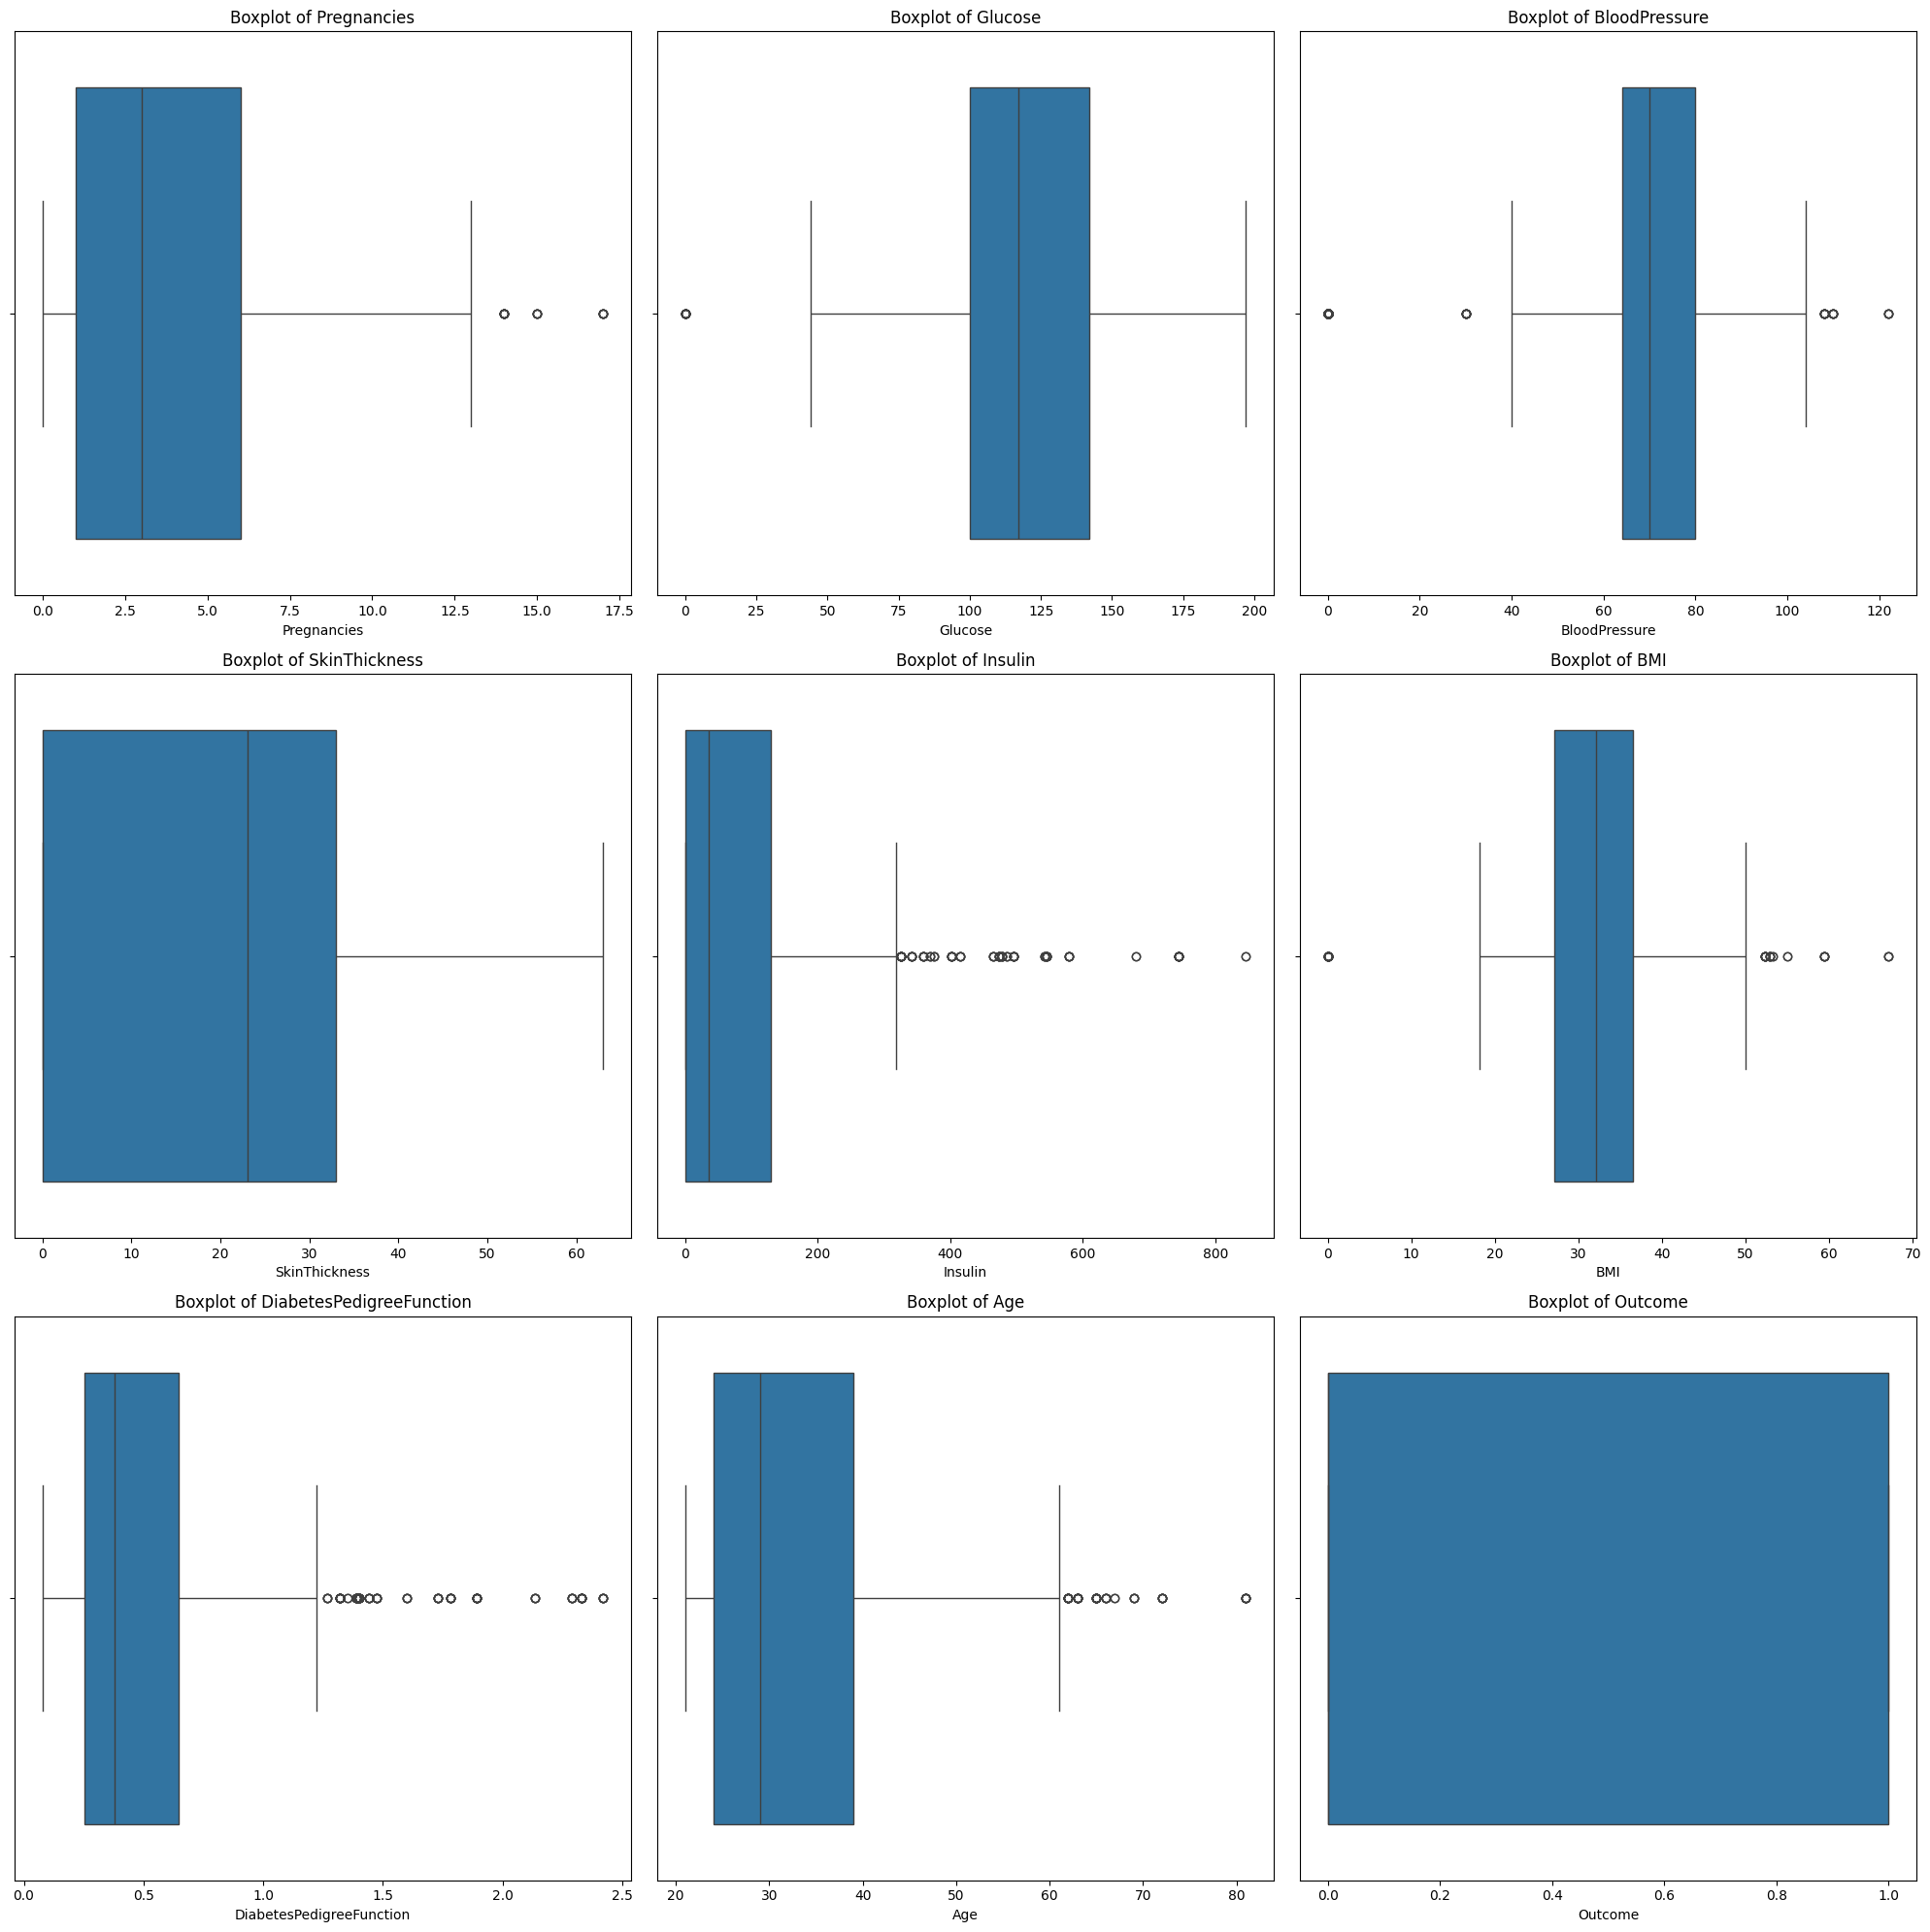

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()
idx = 0

for i in df.select_dtypes(exclude='object'):
    sns.boxplot(x=df[i], ax=axes[idx])
    axes[idx].set_title(f"Boxplot of {i}")
    idx += 1

plt.tight_layout()
plt.show()

Interpretasi: program diatas adalah untuk mengecek nilai outliers pada setiap variabel menggunakan grafik boxplot. Berdasarkan grafik diatas, terdapat beberapa variabel yang memiliki cukup banyak outliers seperti Pregnancies, BloodPressure, Insulin, BMI, DiabetesPedigreeFunction, Age. Maka, perlu dilakukan penanganan outliers untuk membuat model menjadi lebih baik. 

### Handling Outliers dengan Winsorize

In [9]:
def winsorize(data, columns_to_winsorize):
 for col in columns_to_winsorize:
   if col not in data.columns or not pd.api.types.is_numeric_dtype(data[col]):
     continue
   lower_bound = data[col].quantile(0.01, interpolation= 'nearest')
   upper_bound = data[col].quantile(0.99, interpolation= 'nearest')

   data.loc[data[col] < lower_bound, col] = lower_bound
   data.loc[data[col] > upper_bound, col] = lower_bound

columns_to_winsorize = df[['Pregnancies', 
               'Glucose', 
               'BloodPressure', 
               'SkinThickness', 
               'Insulin', 
               'BMI', 
               'DiabetesPedigreeFunction', 
               'Age',]]
winsorize(df, columns_to_winsorize)

Interpretasi: salah satu teknik penanganan outliers adalah winsorizing. Metode ini memotong outliers dan mengubahnya menjadi nilai persentil tertentu yang sudah ditetapkan (nilai persentil 1 dan 99).

### Handling Outliers dengan Nilai Rata-rata

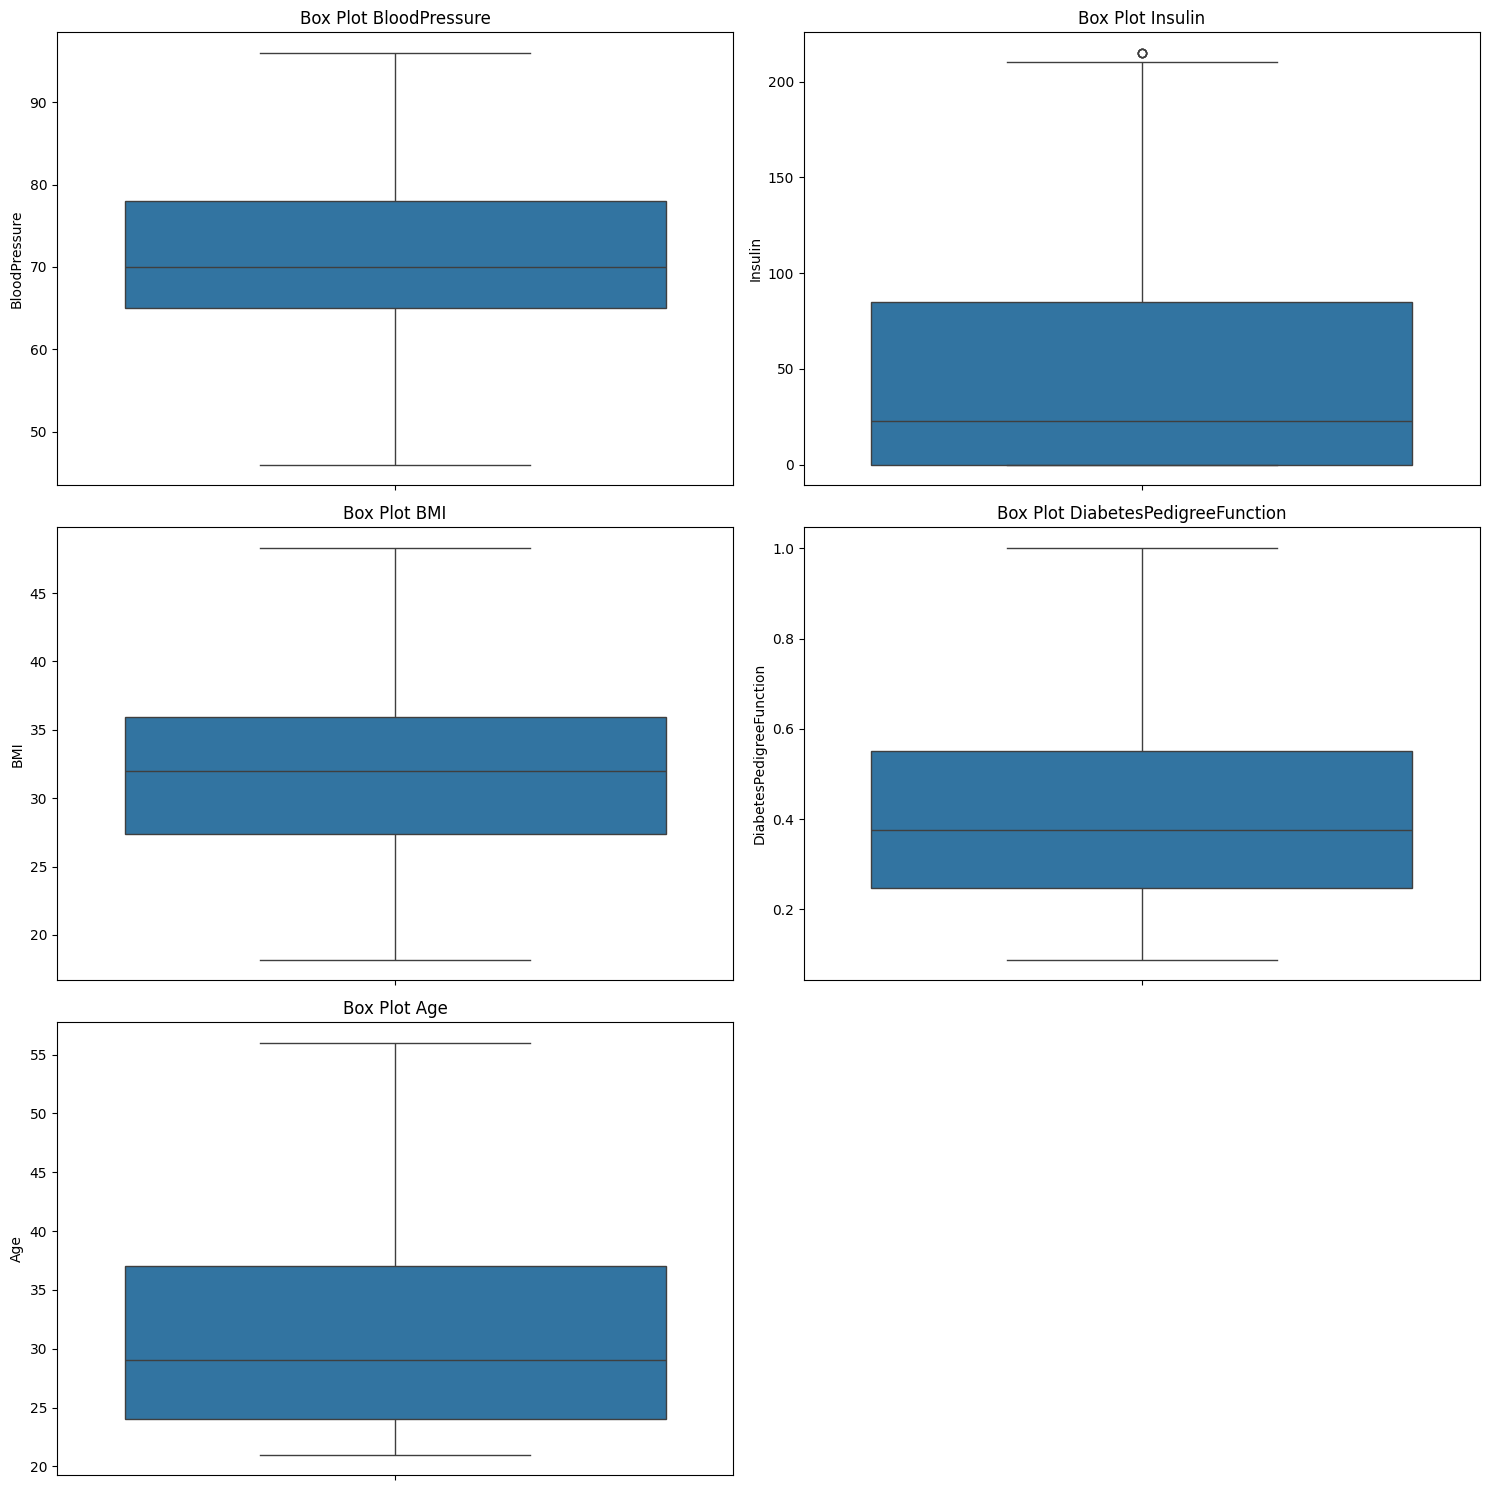

In [24]:
variables = ['BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(15, 15))

for i, var in enumerate(variables, 1):
    # Hitung Q1, Q3, dan IQR
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3-q1

    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr

    mean_val = np.mean(df[var])

    for value in df[var].unique():
        if value > upper_tail or value < lower_tail:
            df[var] = df[var].replace(value, mean_val)

    plt.subplot(3, 2, i)
    sns.boxplot(df[var])
    plt.title(f"Box Plot {var}")

plt.tight_layout()
plt.show()

Interpretasi: salah satu teknik penanganan outliers adalah menggunakan imputasi nilai rata-rata. Nilai outlier dalam data digantikan dengan rata-rata (mean) dari data tersebut.

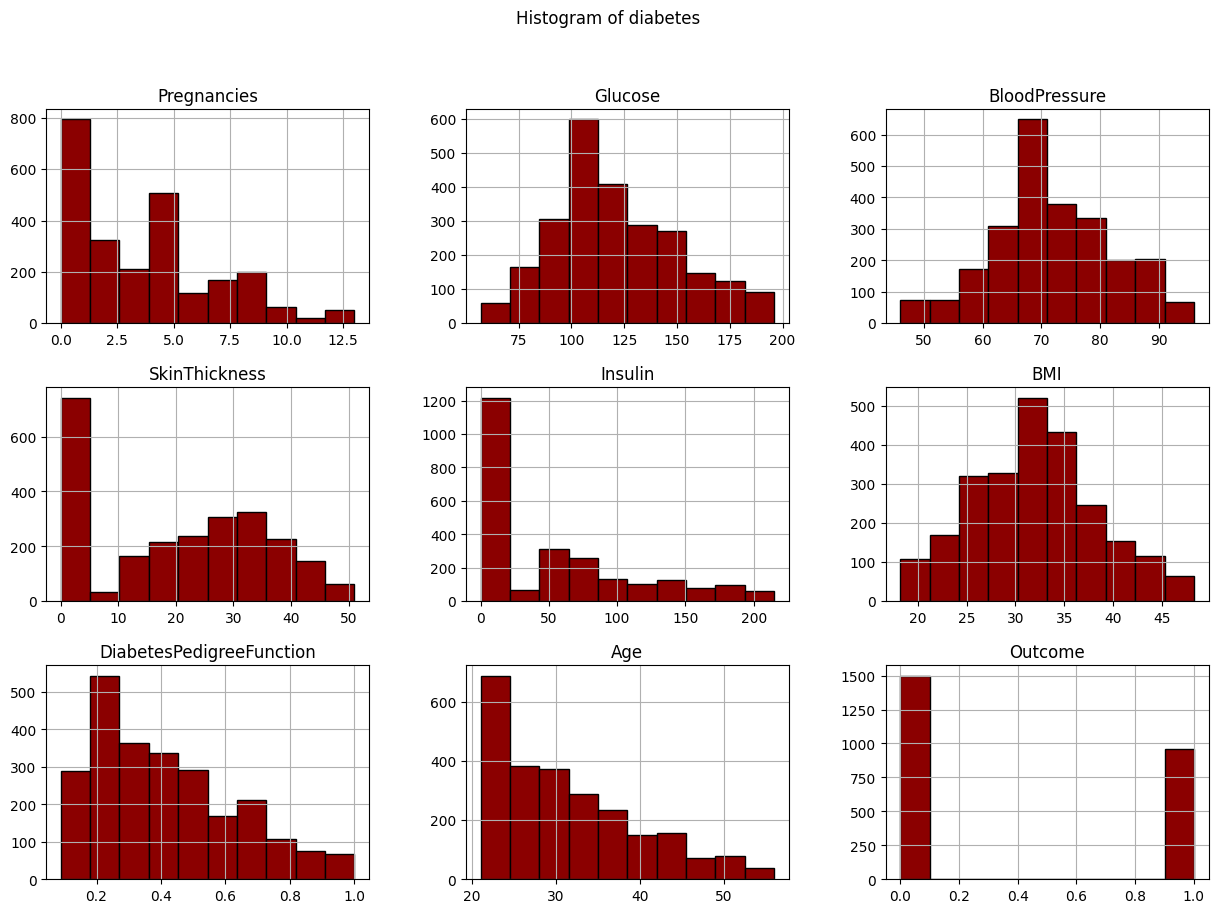

In [25]:
def plot_histograms(data):
    data.hist(bins=10, figsize=(15,10), layout=(3,3), color='darkred', edgecolor='black')
    plt.suptitle("Histogram of diabetes")
    plt.show()

plot_histograms(df)

Interpretasi: selanjutnya, saya membuat diagram histogram untuk memahami distribusi dan karakteristik data. Dari histogram diatas, dapat kita lihat bahwa variabel Glucose, BloodPressure, dan BMI, menunjukkan distribusi yang mendekati normal. Distribusi glukosa memiliki sebagian nilai berada di kisaran 100 hingga 150 mg/dL. Distribusi BloodPressure mendekati normal dengan puncak di sekitar 70-80 mmHg yang dianggap normal untuk kebanyakan orang dewasa. Indeks Massa Tubuh (BMI) memiliki distribusi yang mendekati normal, dengan puncak di sekitar 30-an, sehingga menunjukkan overweight atau obesitas. Dengan analisis ini, kita dapat melanjutkan ke analisis lebih lanjut atau pemodelan.


# Exploratory Data Analysis

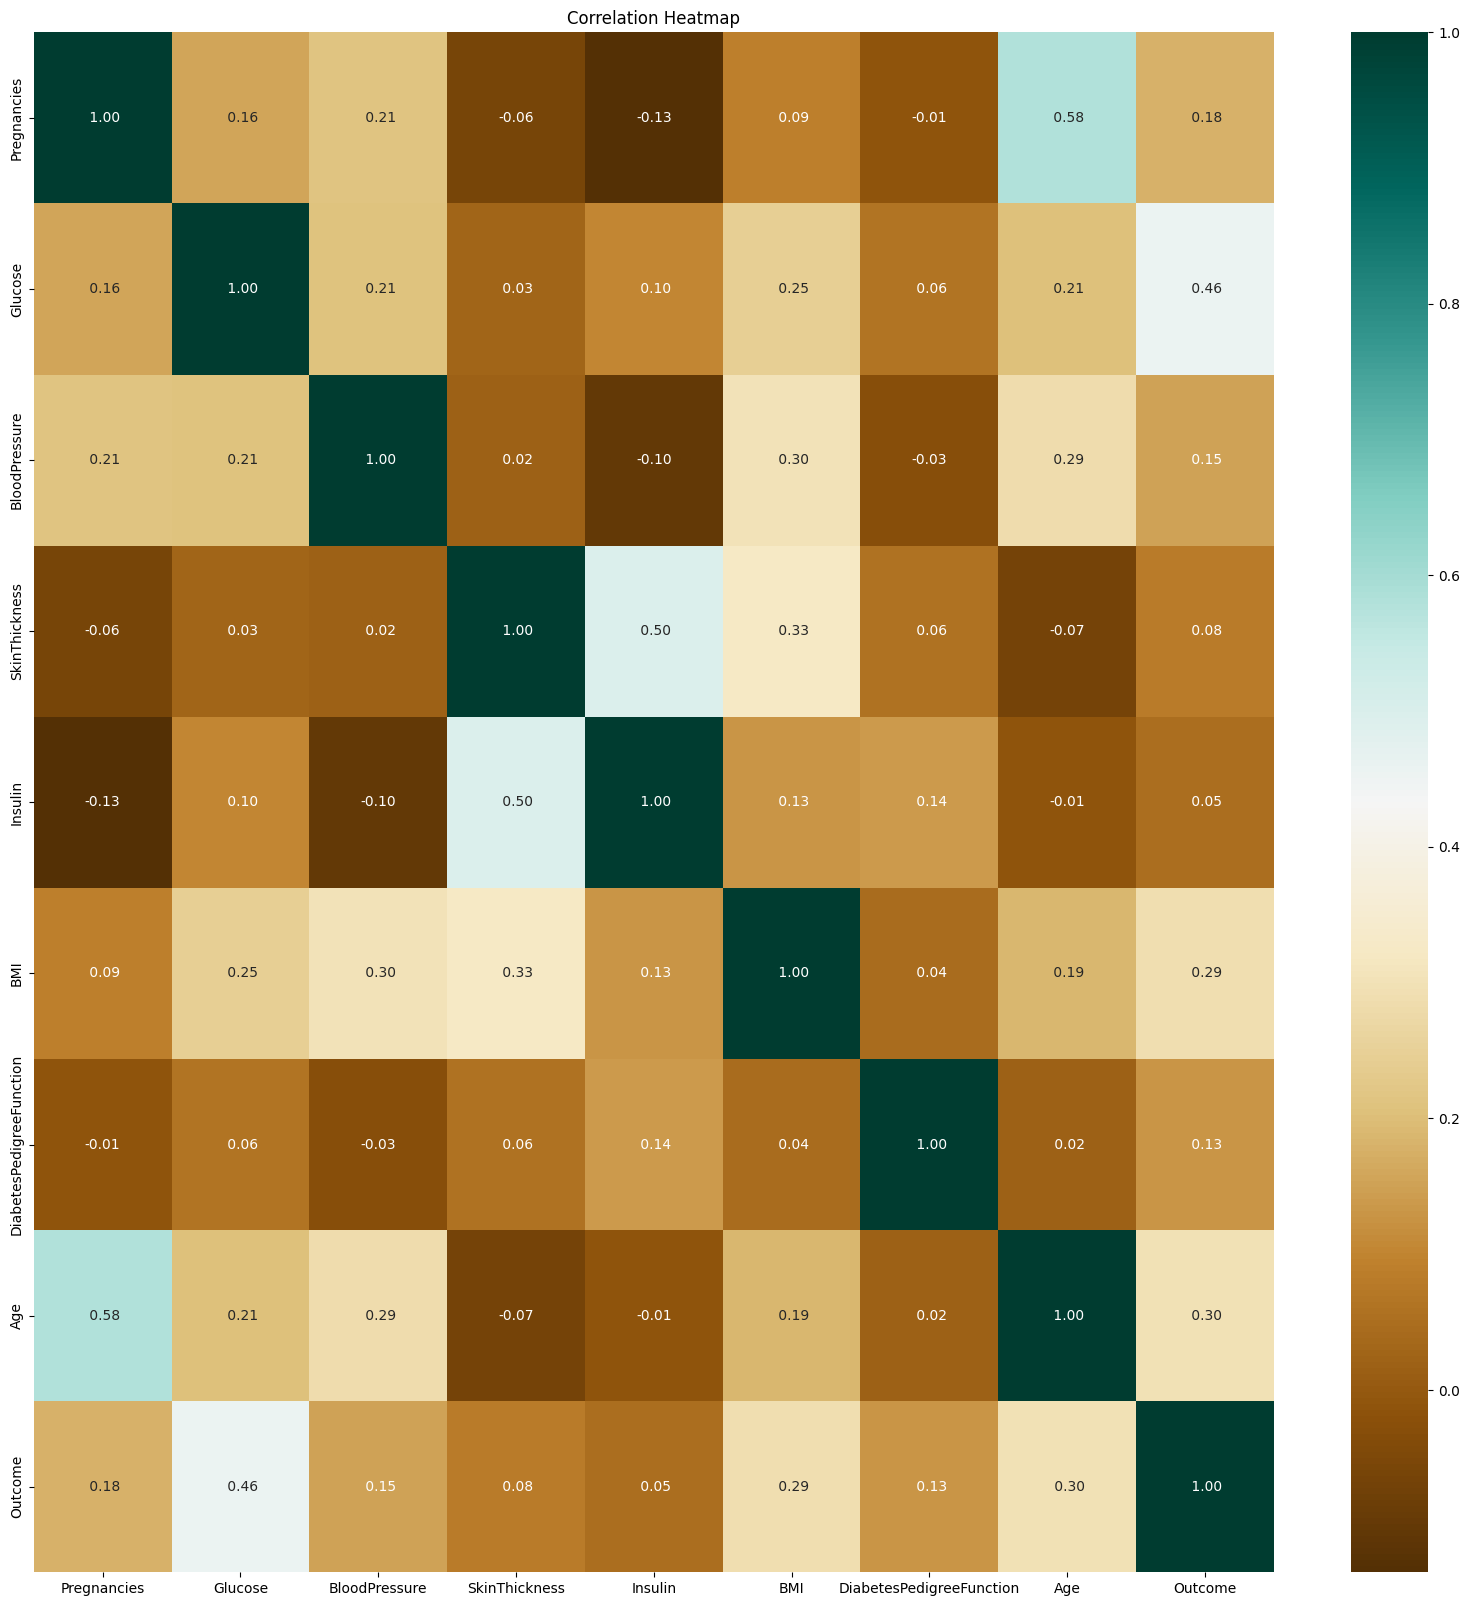

In [26]:
# Melihat nilai korelasi
corr = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='BrBG', fmt=" .2f")
plt.title('Correlation Heatmap')
plt.show()

Interpretasi: analisis selanjutnya, saya akan melihat hubungan antar variabel. Untuk melihat korelasi antar variabel, bisa menggunakan diagram heatmap. Setiap sel di heatmap menunjukkan koefisien korelasi Pearson antara dua variabel, yang berkisar dari -1 hingga 1. Berdasarkan diagram heatmap diatas, variabel Age dan Pregnancies memiliki korelasi positif yang cukup tinggi yaitu sebesar 61%. Artinya, usia yang lebih tua bisa berkaitan dengan jumlah kehamilan yang lebih banyak. Dalam hal ini, kita bisa melakukan analisis lebih lanjut seperti membuat fitur baru yang berkaitan dengan kedua variabel tersebut (Feature Engineering).

In [27]:
# Korelasi Pearson
from scipy.stats import pearsonr

x = df['Age']
y = df['Pregnancies']

# Hitung korelasi Pearson
corr, p_value = pearsonr(x, y)

print("Korelasi Pearson:", corr)
print("Nilai p:", p_value)

if p_value < 0.05:
    if corr > 0:
        print("Ada korelasi positif yang signifikan antara umur dengan masa kehamilan.")
    else:
        print("Ada korelasi negatif yang signifikan antara umur dengan masa kehamilan.")
else:
    print("Tidak ada korelasi yang signifikan antara umur dengan masa kehamilan.")

Korelasi Pearson: 0.5819382488382457
Nilai p: 5.620920277251222e-223
Ada korelasi positif yang signifikan antara umur dengan masa kehamilan.


In [28]:
from sklearn.preprocessing import RobustScaler

numeric_columns = ['Pregnancies', 
               'Glucose', 
               'BloodPressure', 
               'SkinThickness', 
               'Insulin', 
               'BMI', 
               'DiabetesPedigreeFunction', 
               'Age']

scaler = RobustScaler()
numeric_scaled_array = scaler.fit_transform(df[numeric_columns])
numeric_scaled_df = pd.DataFrame(numeric_scaled_array, columns=numeric_columns)

Interpretasi: selanjutnya, kita dapat menormalisasikan data. Tujuannya adalah untuk mengurangi skala variabilitas antar variabel sehingga lebih seimbang saat digunakan dalam algoritma berbasis jarak seperti KNN. Dalam kasus ini, saya menggunakan Robust Scaler yang menggunakan median dan interquartile range (IQR) karena tahan terhadap outliers (dalam kasus ini, data saya memiliki sebagian outliers walaupun sudah di handling menggunakan winsorize maupun mean imputation).

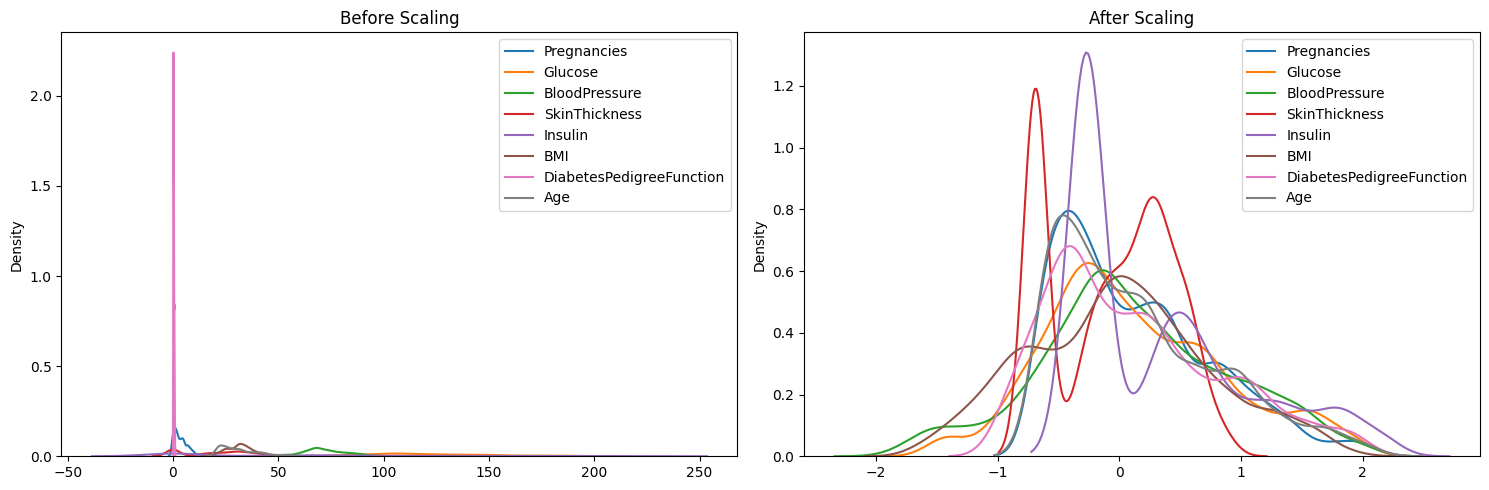

In [29]:
plt.figure(figsize=(15, 5))

# Plot Before Scaling
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(df[column], hist=False, label=column)
plt.title('Before Scaling')
plt.xlabel('')
plt.legend()

# Plot After Scaling
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(numeric_scaled_df[column], hist=False, label=column)
plt.title('After Scaling')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# Evaluasi Model
X = df.drop(columns=['Outcome'])
y = df['Outcome']

models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# 10-old cross-validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

fitted_models = {}

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=kf, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])

    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision_weighted'].mean()
    recall = scores['test_recall_weighted'].mean()
    f1 = scores['test_f1_weighted'].mean()

    model.fit(X, y)
    y_pred = model.predict(X)
    print(f'Classification Report for {name}:')
    print(classification_report(y, y_pred))
    print('-' * 60)

    metrics_dict['Model'].append(name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1-Score'].append(f1)

    fitted_models[name] = model

metrics_df = pd.DataFrame(metrics_dict)
print("\nMetrics Summary:")
print(metrics_df.round(4).to_string(index=False))

Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       0.99      0.99      0.99       960

    accuracy                           1.00      2460
   macro avg       1.00      0.99      0.99      2460
weighted avg       1.00      1.00      1.00      2460

------------------------------------------------------------
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00       960

    accuracy                           1.00      2460
   macro avg       1.00      1.00      1.00      2460
weighted avg       1.00      1.00      1.00      2460

------------------------------------------------------------
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1500
    

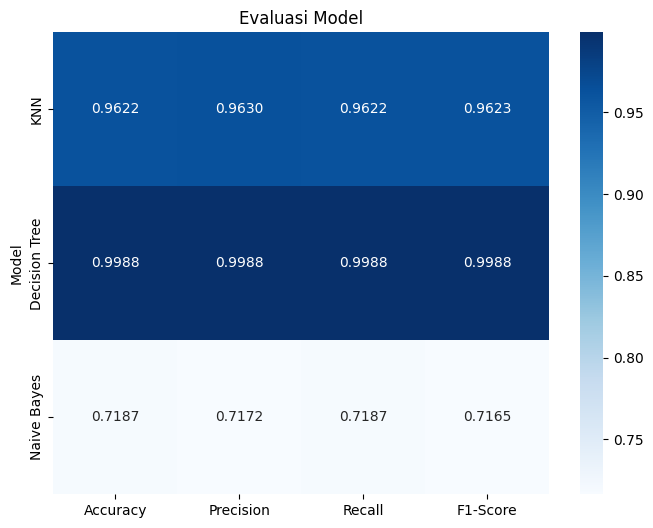

In [31]:
# Visualisasi dengan heatmap
plt.figure(figsize=(8, 6))
metrics_for_heatmap = metrics_df.set_index('Model')
sns.heatmap(metrics_for_heatmap, annot=True, cmap='Blues', fmt='.4f')
plt.title('Evaluasi Model')
plt.show()

Interpretasi: Finally, kita masuk ke tahap modelling. Pada tahap ini kita akan mengecek prediksi model menggunakan tiga model, yaitu KNN, Decision Tree, dan Naive Bayes. Berdasarkan metrik evaluasi diatas, Naive Bayes cenderung menghasilkan performa yang kurang baik dibandingkan KNN maupun Decision Tree. Hal ini bisa terjadi karena Naive Bayes mengasumsikan bahwa semua fitur bersifat independen atau tidak saling berhubungan, sementara terdapat beberapa fitur yang memiliki korelasi yang cukup tinggi (Age dan Pregnancies). Selain itu, Naive Bayes kurang tahan terhadap outlier karena berdasarkan pada probabilitas, sementara Decision Tree lebih tahan terhadap outlier karena membagi data menjadi beberapa bagian dan KNN juga tahan terhadap outlier karena mengandalkan kedekatan (jarak) antar data dalam menentukan kelas.